In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Scikit Imports
from sklearn.model_selection import train_test_split

from keras import regularizers, losses
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras.layers import Dropout, GlobalAveragePooling2D, BatchNormalization, Activation,Dense, Conv2D
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.inception_v3 import InceptionV3

from tqdm import tqdm

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
import os
os.chdir("C:/Users/siddp/OneDrive/Desktop/project/Dataset/cats_vs_dogs")

train_folder = 'training_set/'
test_folder = "test_set/"

In [4]:
import glob

image_list = []

for name in glob.glob(train_folder + 'cats/*'):
    image_list.append(name)

for name in glob.glob(train_folder + 'dogs/*'):
    image_list.append(name)    


data = pd.DataFrame()
data["image"] = image_list

# path joining version for other paths
DIR = train_folder + "cats"
x = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print(x)

DIR = train_folder + "dogs"
xx = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print(xx)


labels = np.concatenate((np.zeros(shape=(x,)), np.ones(shape=(xx,))), axis=0)
data["labels"] = labels

4000
4005


In [5]:
print(data.shape)
data.head()

(8005, 2)


,image,labels
0,training_set/cats\cat.1.jpg,0.0
1,training_set/cats\cat.10.jpg,0.0
2,training_set/cats\cat.100.jpg,0.0
3,training_set/cats\cat.1000.jpg,0.0
4,training_set/cats\cat.1001.jpg,0.0


In [6]:
# got lucky freaky path can be processed as it is.   

In [7]:
train_data = np.array([img_to_array(
                                    load_img(img, target_size=(150, 150))
                                    ) for img in tqdm(data['image'].values.tolist())
                      ]).astype('float32')

train_data.shape

100%|██████████| 8005/8005 [00:07<00:00, 1045.48it/s]


(8005, 150, 150, 3)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train_data, 
                                                    data["labels"], 
                                                    test_size=0.3, 
                                                    random_state=42)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5603, 150, 150, 3)
(5603,)
(2402, 150, 150, 3)
(2402,)


In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(5042, 150, 150, 3)
(5042,)
(561, 150, 150, 3)
(561,)


In [12]:
model = Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D((2, 2)),
        layers.Flatten(),
        layers.Dense(units=512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=Adam(),
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [14]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val),
                verbose=True)

model.evaluate(x_test, y_test, batch_size=64, verbose=True)

Epoch 1/10
79/79 [==============================] - 20s 241ms/step - loss: 12.6501 - accuracy: 0.5510 - val_loss: 0.6704 - val_accuracy: 0.5775
Epoch 2/10
79/79 [==============================] - 19s 241ms/step - loss: 0.6037 - accuracy: 0.6696 - val_loss: 0.6817 - val_accuracy: 0.5579
Epoch 3/10
79/79 [==============================] - 20s 252ms/step - loss: 0.4963 - accuracy: 0.7489 - val_loss: 0.7734 - val_accuracy: 0.6043
Epoch 4/10
79/79 [==============================] - 20s 253ms/step - loss: 0.3552 - accuracy: 0.8393 - val_loss: 0.8276 - val_accuracy: 0.6168
Epoch 5/10
79/79 [==============================] - 20s 256ms/step - loss: 0.2048 - accuracy: 0.9082 - val_loss: 1.1471 - val_accuracy: 0.6364
Epoch 6/10
79/79 [==============================] - 20s 255ms/step - loss: 0.1477 - accuracy: 0.9464 - val_loss: 1.2640 - val_accuracy: 0.6346
Epoch 7/10
79/79 [==============================] - 21s 262ms/step - loss: 0.1529 - accuracy: 0.9443 - val_loss: 1.3265 - val_accuracy: 0.622

[1.7224178314208984, 0.6382181644439697]

In [16]:
# plotting the graph

from matplotlib import pyplot as plt
import seaborn as sn

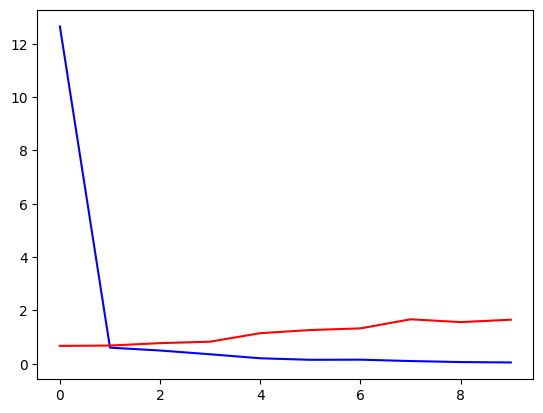

In [21]:
acc = hist.history['loss']
val_acc = hist.history['val_loss']
plt.plot(acc, 'b', label='Training loss')
plt.plot(val_acc, 'r', label='Validation loss')
plt.show()

In [15]:
#From the above results, it is clear that the model's generalization capabilities are exceptionally bad,

In [12]:
# We use the pre-trained model Inception v3 from google for our dog vs cat classification problem

base_inception = InceptionV3(weights='imagenet', include_top = False, input_shape=(150, 150, 3))


# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(128, activation='relu')(out)
predictions = Dense(1, activation='sigmoid')(out)

In [13]:
transfer_model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
transfer_model.compile(Adam(learning_rate=.0001), loss='binary_crossentropy', metrics=['accuracy']) 

transfer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [14]:
history = transfer_model.fit(x_train, y_train, batch_size=128, epochs=20, 
                verbose=True, validation_data=(x_val, y_val))

Epoch 1/20
40/40 [==============================] - 29s 650ms/step - loss: 4.4181 - accuracy: 0.5585 - val_loss: 3.1327 - val_accuracy: 0.5758
Epoch 2/20
40/40 [==============================] - 25s 629ms/step - loss: 2.1947 - accuracy: 0.6069 - val_loss: 3.5592 - val_accuracy: 0.5027
Epoch 3/20
40/40 [==============================] - 26s 659ms/step - loss: 1.8931 - accuracy: 0.6184 - val_loss: 2.1210 - val_accuracy: 0.5722
Epoch 4/20
40/40 [==============================] - 29s 735ms/step - loss: 1.4261 - accuracy: 0.6551 - val_loss: 2.2943 - val_accuracy: 0.5544
Epoch 5/20
40/40 [==============================] - 28s 707ms/step - loss: 1.3238 - accuracy: 0.6634 - val_loss: 1.7402 - val_accuracy: 0.5918
Epoch 6/20
40/40 [==============================] - 27s 688ms/step - loss: 1.0096 - accuracy: 0.6944 - val_loss: 1.7088 - val_accuracy: 0.5865
Epoch 7/20
40/40 [==============================] - 28s 695ms/step - loss: 0.9070 - accuracy: 0.7196 - val_loss: 1.7428 - val_accuracy: 0.5508

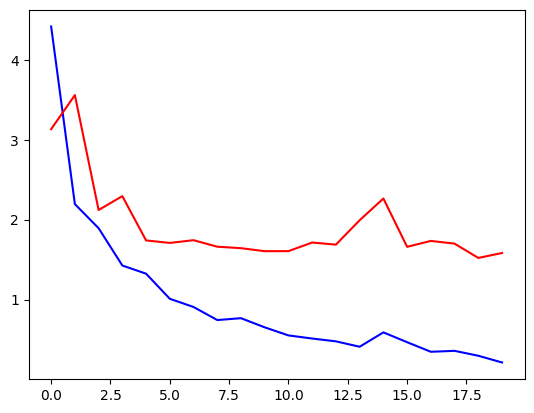

In [17]:
acc = history.history['loss']
val_acc = history.history['val_loss']
plt.plot(acc, 'b', label='Training loss')
plt.plot(val_acc, 'r', label='Validation loss')
plt.show()

In [18]:
# The accuracy is still not "presentable", that's mostly before the dataset is small and inference points are limited for the model to work on
# The next step to take is to create a larger dataset, either by procuring more images or augmenting the existing images to stuff up the 
# existing dataset and then retrain the model.